In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# The boston dataset

In [2]:
boston = datasets.load_boston()
input_x = boston.data
input_y = boston.target

## Data scription

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Regressor variables

In [4]:
print("Regressor:", boston.feature_names, "\n\nShape:", boston.data.shape)

Regressor: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Shape: (506, 13)


In [5]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 神經元設定 : 8個隱藏層，前寬厚窄，2個合成函數
## 第1隱藏層設定0.5的Dropout

In [6]:
n_in = 13
n_h1 = 50
n_h2 = 20
n_h3 = 1
n_h4 = 40
n_h5 = 10
n_h6 = 1
n_h7 = 30
n_h8 = 5
n_out = 1

In [7]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
#             Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
            Weights = tf.Variable(tf.random_normal([in_size, out_size], mean=0., stddev=0.3))
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b') # 
#             biases = tf.Variable(tf.zeros([1, out_size]) + 0.03)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

In [8]:
xs = tf.placeholder(tf.float32, [None, n_in])
ys = tf.placeholder(tf.float32, [None, n_out])

In [9]:
h1 = add_layer(xs, n_in, n_h1, activation_function=tf.nn.elu)
h2 = add_layer(tf.nn.dropout(h1, 0.5), n_h1, n_h2, activation_function=tf.nn.relu)
h3 = add_layer(h2, n_h2, n_h3, activation_function=None)
h4 = add_layer(h3, n_h3, n_h4, activation_function=tf.nn.elu)
h5 = add_layer(h4, n_h4, n_h5, activation_function=tf.nn.elu)

h6 = add_layer(h5, n_h5, n_h6, activation_function=None)
h7 = add_layer(h6, n_h6, n_h7, activation_function=tf.nn.elu)
h8 = add_layer(h7, n_h7, n_h8, activation_function=tf.nn.elu)

prediction = add_layer(h8, n_h8, n_out, activation_function=tf.nn.elu)

## Loss funtion : MSE
## Use AdagradOptimizer with learning rate = 0.3

In [26]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(0.1).minimize(loss)

# Split train & test

In [27]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [28]:
train_x, test_x, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.2)
train_y, test_y = train_y.reshape([train_y.shape[0], 1]), test_y.reshape([test_y.shape[0], 1])

In [29]:
print(sess.run(loss, feed_dict={xs: train_x, ys: train_y}))
print(sess.run(loss, feed_dict={xs: test_x, ys: test_y}))

361.581
322.455


In [30]:
batch_xs = train_x
batch_ys = train_y

In [33]:
for i in range(60000):
#     training
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 1000 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: train_x, ys: train_y}))

15.1065
16.7504
11.9345
11.4978
13.9226
16.2007
11.853
13.8553
13.1328
14.3331
12.0502
12.6306
10.5952
14.6474
10.0046
12.623
12.1529
11.6056
9.51035
12.3902
14.4396
12.5355
12.1435
11.2705
10.9434
12.3526
12.6522
10.3925
11.2569
11.044
12.9716
13.4128
10.1812
11.2024
10.2209
11.4662
10.3854
11.1727
9.4489
9.59148
9.32655
11.1356
13.2465
11.9507
12.5222
10.2787
10.8259
9.43175
10.808
9.20911
10.754
11.9459
9.89323
10.1984
13.3726
12.6828
10.935
8.79103
13.0854
11.3262


In [34]:
print(sess.run(loss, feed_dict={xs: train_x, ys: train_y}))
print(sess.run(loss, feed_dict={xs: test_x, ys: test_y}))

10.7601
8.49092


In [35]:
print(train_y.shape, test_y.shape)

(404, 1) (102, 1)


# Fitting Curve
## x : index
## y : price

## Train data fitting

In [36]:
train_x, test_x, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.2)
train_y, test_y = train_y.reshape([train_y.shape[0], 1]), test_y.reshape([test_y.shape[0], 1])

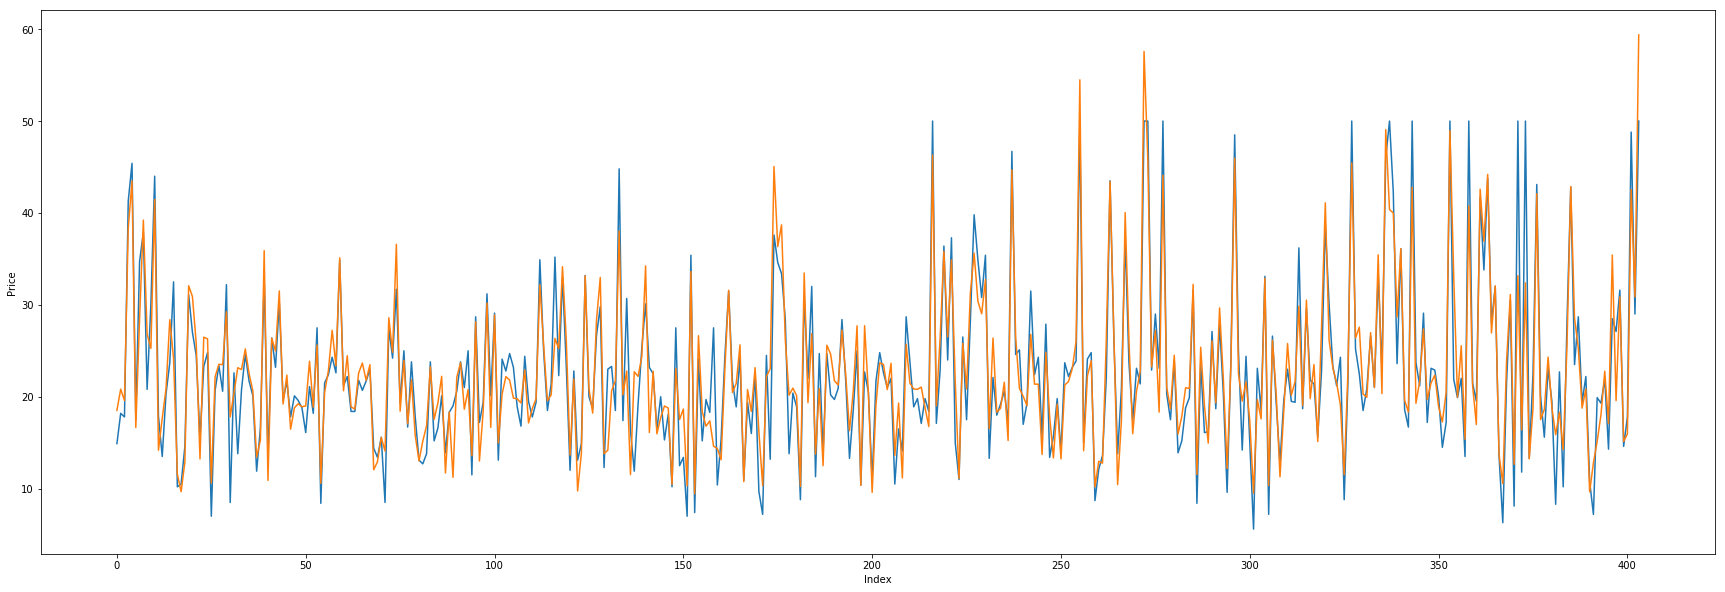

In [37]:
plt.figure(figsize=(30, 10))
ax = plt.subplot()
ax.set_xlabel('Index')
ax.set_ylabel('Price')
plt.plot(range(404), train_y)
plt.plot(range(404), sess.run(prediction, feed_dict={xs:train_x}))
plt.show()

## Test data fitting

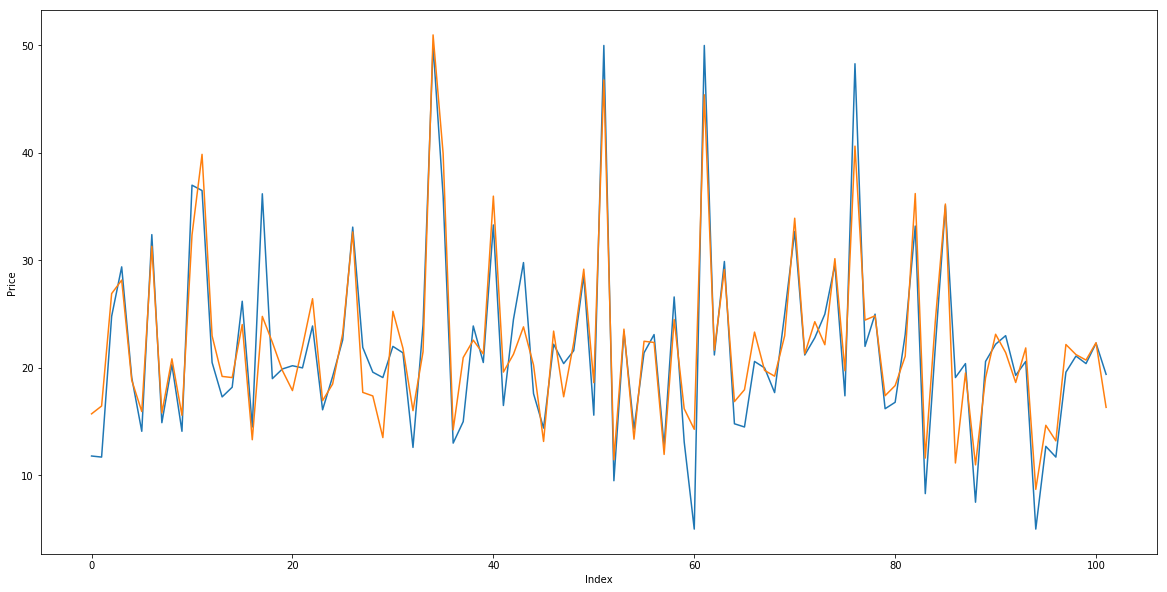

In [38]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.set_xlabel('Index')
ax.set_ylabel('Price')
plt.plot(range(102), test_y)
plt.plot(range(102), sess.run(prediction, feed_dict={xs:test_x}))
plt.show()

## Test data residual

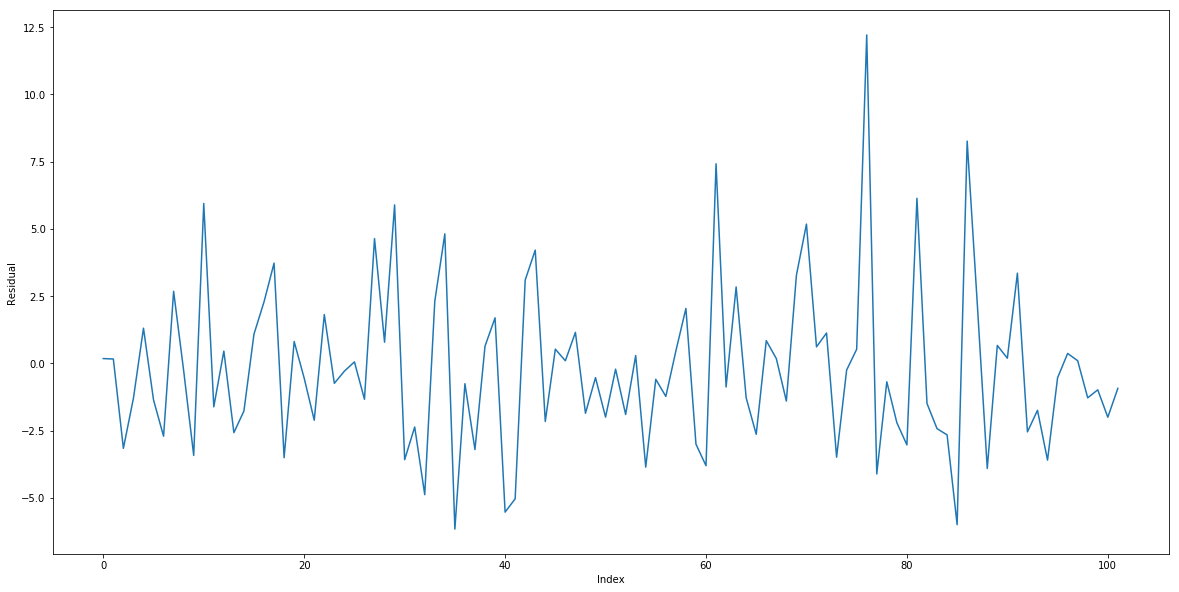

In [39]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.set_xlabel('Index')
ax.set_ylabel('Residual')

plt.plot(range(102), test_y - sess.run(prediction, feed_dict={xs:test_x}))
plt.show()